In [77]:
#60211642
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from matplotlib import font_manager, rc
from decimal import Decimal
import matplotlib.pyplot as plt

data = pd.read_csv("./SDA#Project_60211642/코로나바이러스감염증-19_확진환자_발생현황_221126.csv", header = 0)
data.tail(10)

,일자,계(명),국내발생(명),해외유입(명),사망(명),Unnamed: 5,열2,열3,열4,열5,Unnamed: 10,Unnamed: 11
1033,2022.11.18,"49,399","49,333",66,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1034,2022.11.19,"50,568","50,518",50,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1035,2022.11.20,"45,998","45,940",58,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1036,2022.11.21,"23,077","23,016",61,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1037,2022.11.22,"72,860","72,779",81,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1038,2022.11.23,"70,306","70,237",69,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1039,2022.11.24,"59,082","59,027",55,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040,2022.11.25,"53,698","53,659",39,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,2022.11.26,"52,788","52,726",62,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,누적(명),"26,890,488","26,819,311","71,177","30,330",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# 맥 개발환경 한국어 설정을 위함.
import matplotlib as mpl
#by_60211642
print(mpl.matplotlib_fname())

# 맥 개발환경 한국어 설정을 위함.
font_path="./SDA#Project_60211642/NanumGothicBold.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc("font",family=font_name)

/Users/jieunsong/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [34]:
df_covid = data.loc[:,['일자','계(명)','사망(명)']][:1042]
df_accumulate = data.loc[:,['일자','계(명)','사망(명)']][1042:1043] 
df_covid = df_covid.replace("-", 0).set_index('일자')
# 해당 날짜까지 누적 확진자 수 필요.
#by_60211642
df_covid["누적 확진자 수"] = df_covid["계(명)"]
def cumulative_number(i):
    if i == 0:
        df_covid["누적 확진자 수"][0] = int(df_covid["계(명)"][0])
    else:
        if type(df_covid["계(명)"][i]) != int :
            p = df_covid["계(명)"][i].split(",")
            str_confirmed = ""
            num_confirmed = 0
            for j in range(len(p)):
                str_confirmed+=p[j]
            df_covid["계(명)"][i] = int(str_confirmed)
            
        df_covid["누적 확진자 수"][i] = int(df_covid["누적 확진자 수"][i-1]) + df_covid["계(명)"][i]

# df_covid["누적 확진자 수"]
for i in range(len(df_covid)):
    cumulative_number(i)
    
#by_60211642
df_covid_etc = df_covid.loc['2020.1.20':"2021.7.30"]
df_covid_delta = df_covid.loc["2021.7.31":"2022.1.23"]
df_covid_omi = df_covid.loc["2022.1.24":]

### 위에는 광영님이 작성하신 코드
### 아래부터 추가 코드_ 송지은

In [47]:
#치명률 구하는 코드
df_covid["치명률"] = df_covid["사망(명)"]
for i in range(len(df_covid)):
    data = df_covid["누적 확진자 수"][i]
    if i == 0:
        df_covid["치명률"][0] = 0
    elif data == 0:
        df_covid["치명률"][i] = 0
    elif data != 0:
        #분자 (당일 사망자 수 * 20)
        #분모 (누적 확진자 수 / 1000)
        p_lethality = (float(df_covid["사망(명)"][i])* 20)//float(data/1000)
        df_covid["치명률"][i] = int(p_lethality)

In [54]:
#감염률 구하는 코드
df_covid["감염률"] = df_covid["계(명)"]
def infection_rate(i):
    rok_pop = 51628117
    if i == 0:
        df_covid["감염률"][0] = int(df_covid["계(명)"][0])/rok_pop
    else:
        #분모 (전체 국민 - 당일의 누적 확진자 수)
        denominator = (rok_pop - df_covid["누적 확진자 수"][i-1])
        #분자 (당일의 확진자 수)
        numerator = df_covid["계(명)"][i]
        p_infection = float(numerator/denominator)
        df_covid["감염률"][i] = p_infection

In [55]:
# 우세종에 따른 데이터 구간 나누기
df_covid_etc = df_covid.loc['2020.1.20':"2021.7.30"]
df_covid_delta = df_covid.loc["2021.8.16":"2022.1.23"]
df_covid_omi = df_covid.loc["2022.2.10":]

df_covid_omi

,계(명),사망(명),누적 확진자 수,치명률,감염률
일자,,,,,
2022.2.10,54115,20,1185088,0,54115
2022.2.11,53886,49,1238974,0,53886
2022.2.12,54931,33,1293905,0,54931
2022.2.13,56397,36,1350302,0,56397
2022.2.14,54554,21,1404856,0,54554
...,...,...,...,...,...
2022.11.22,72860,45,26654614,0,72860
2022.11.23,70306,53,26724920,0,70306
2022.11.24,59082,59,26784002,0,59082


### 1. t-test 목표
- 감염률의 상승과 치명률의 감소를 확인

### 2. 귀무가설
- H0 : 코로나 바이러스가 진화를 거듭해도 감염률과 치명률은 변화가 없다.
- H1 : 코로나 바이러스가 진화를 거듭했을 때 감염률과 치명률에 변화가 있다.

### 3. t-test 조건
- 서로 다른 두 집단의 평균을 비교할 떄, 독립성이 가정되는가?
- 정규성이 만족되는가?
- 등분산성이 만족되는가?

#### 3.1 서로 다른 두 집단의 평균을 비교할 때, 독립성이 가정되는가?

- 가정된다.

Shapiro Test-statistics : 0.8401010036468506, p-value : 2.9307381697536525e-23
Shapiro Test-statistics : 0.8569004535675049, p-value : 3.121907940495383e-11
Shapiro Test-statistics : 0.74629807472229, p-value : 8.470461142894416e-21
Shapiro Test-statistics : 0.17508912086486816, p-value : 8.547920632381384e-44
Shapiro Test-statistics : 0.7544834613800049, p-value : 4.046589367707803e-15
Shapiro Test-statistics : 0.05546647310256958, p-value : 2.1331821684207418e-35


/Users/jieunsong/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


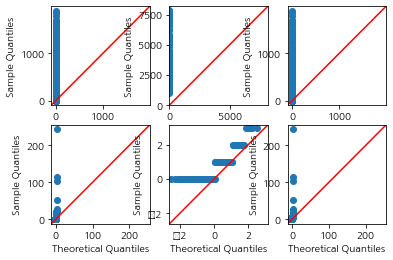

In [86]:
#### 3.2 정규성이 만족되는가?

import statsmodels.api as sm



df_covid_etc = df_covid_etc.astype({'감염률' : 'float'})
df_covid_delta = df_covid_delta.astype({'감염률' : 'float'})
df_covid_omi = df_covid_omi.astype({'감염률' : 'float'})

fig, ax = plt.subplots(ncols=3, nrows=2)

fig = sm.qqplot(df_covid_etc['감염률'], line='45',ax=ax[0,0])
fig = sm.qqplot(df_covid_delta['감염률'], line='45',ax=ax[0,1])
fig = sm.qqplot(df_covid_etc['감염률'], line='45',ax=ax[0,2])

test_stat, p_val = stats.shapiro(df_covid_etc["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_delta["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_omi["감염률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))

# 정규성이 만족되지 않는다.

fig = sm.qqplot(df_covid_etc['치명률'], line='45',ax=ax[1,0])
fig = sm.qqplot(df_covid_delta['치명률'], line='45',ax=ax[1,1])
fig = sm.qqplot(df_covid_etc['치명률'], line='45',ax=ax[1,2])

test_stat, p_val = stats.shapiro(df_covid_etc["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_delta["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.shapiro(df_covid_omi["치명률"])
print("Shapiro Test-statistics : {}, p-value : {}".format(test_stat, p_val))

In [88]:
# Wilcoxon rank-sum test 실행

# df_covid_etc
# df_covid_delta
# df_covid_omi

print("감염률")
test_stat, p_val = stats.ranksums(df_covid_omi['감염률'],df_covid_delta['감염률'])
print("rank-sum Test-statistics omi-delta : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.ranksums(df_covid_etc['감염률'],df_covid_delta['감염률'])
print("rank-sum Test-statistics etc-delta: {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.ranksums(df_covid_omi['감염률'],df_covid_etc['감염률'])
print("rank-sum Test-statistics omi-ect: {}, p-value : {}".format(test_stat, p_val))

print("치명률")
test_stat, p_val = stats.ranksums(df_covid_omi['치명률'],df_covid_delta['치명률'])
print("rank-sum Test-statistics omi-delta : {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.ranksums(df_covid_etc['치명률'],df_covid_delta['치명률'])
print("rank-sum Test-statistics etc-delta: {}, p-value : {}".format(test_stat, p_val))
test_stat, p_val = stats.ranksums(df_covid_omi['치명률'],df_covid_etc['치명률'])
print("rank-sum Test-statistics omi-ect: {}, p-value : {}".format(test_stat, p_val))

감염률
rank-sum Test-statistics omi-delta : 17.366898415962904, p-value : 1.4695776875154594e-67
rank-sum Test-statistics etc-delta: -19.15537964614278, p-value : 8.728652270273174e-82
rank-sum Test-statistics omi-ect: 23.91238424208976, p-value : 2.276712518052433e-126
치명률
rank-sum Test-statistics omi-delta : -8.314333808102427, p-value : 9.226910350090642e-17
rank-sum Test-statistics etc-delta: 2.408582352915936, p-value : 0.016014612751225392
rank-sum Test-statistics omi-ect: -11.840634807503204, p-value : 2.406247180159304e-32
